In [1]:
import classifier.classifier as classifier
classifier.setup()
exit() 


# ==============================
#     LANGUAGE MODEL
# ==============================

# ==============================
#     ONTOLOGY
# ==============================
Nothing to do. The ontology file is already available.

# ==============================
#     CACHED WORD2VEC MODEL
# ==============================
Nothing to do. The model is already available.


In [12]:
import networkx as nx
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
for dirname, _, filenames in os.walk('/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/Monster_usa_job_listings_dataset_20190601_20190930__20k_data.ldjson
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/alldata.csv
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/data_scientist_united_states_job_postings_jobspikr.csv
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/10_4231_R7B27SJS.zip
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/temp.json
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/10_4231_R7R78CGR.zip
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/10_4231_R7MK6B49.zip
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/temp1.json
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/rawdata/postings/contains-ds-postings.csv
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/rawdata/postings/ds-data-raw.zip
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/rawdata/curriculum/NCSU.csv
/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/rawdata/curriculum/VRGN.csv
/h

In [5]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [15]:
nRowsRead = None #1000 # specify 'None' if want to read whole file
usa_jobs = pd.read_csv('/home/rudresh/Documents/MSC3/S5/Code/DataScienceSkill/data_scientist_united_states_job_postings_jobspikr.csv', delimiter=',', nrows = nRowsRead)
usa_jobs.dataframeName = 'data_scientist_united_states_job_postings_jobspikr.csv'
nRow, nCol = usa_jobs.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10000 rows and 22 columns


In [16]:
usa_jobs.head(5)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN


In [17]:
usa_jobs['job_description'][0]

"Read what people are saying about working here. \n\nWe are Farmers!\n\nJoin a team of diverse professionals at Farmers to acquire skills on the job and apply your learned knowledge to future roles at Farmers. Farmers Insurance also offers extensive training opportunities through the award winning University of Farmers named by Training magazine amongst top 10 corporate training units in the world. Start your career at Farmers today!\n\nJob Summary\n\nThe Enterprise Data Scientist I will be a valuable part of the Data Science team who provide statistical analysis, modeling, and vis ualization services for all lines of business and all shared service functions at Farmers Insurance Group. The Data Scientist 1 will work on end to end solutions as part of a team. They will design innovative analytic models and will be responsible for pulling and cleaning datasets, evaluating models, and presenting results to internal teams.\n\nEssential Job Functions\n\nExtract data from a variety of sourc

In [18]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english'))
description_example = usa_jobs.job_description[2].lower()
word_tokens = word_tokenize(description_example)
filtered_description = [w for w in word_tokens if not w in stop_words]
filtered_description = " ".join(filtered_description)
# aggregate_descriptions = " ".join(job_description.lower() 
#                       for job_description in usa_jobs.job_description)
# word_tokens = word_tokenize(aggregate_descriptions)
# word_tokens = set(word_tokens)
# filtered_description = [w for w in word_tokens if not w in stop_words]

In [19]:
for i in filtered_description:
    if i.isnumeric():
        filtered_description.remove(i)


In [20]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib.pyplot import plot
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
#sorted_req
stopwords = set(STOPWORDS)

In [21]:
aggregate_descriptions = " ".join(job_description.lower() 
                      for job_description in usa_jobs.job_description)
stopwords = set(STOPWORDS)

In [22]:
aggregate_descriptions[0:1000]

'read what people are saying about working here. \n\nwe are farmers!\n\njoin a team of diverse professionals at farmers to acquire skills on the job and apply your learned knowledge to future roles at farmers. farmers insurance also offers extensive training opportunities through the award winning university of farmers named by training magazine amongst top 10 corporate training units in the world. start your career at farmers today!\n\njob summary\n\nthe enterprise data scientist i will be a valuable part of the data science team who provide statistical analysis, modeling, and vis ualization services for all lines of business and all shared service functions at farmers insurance group. the data scientist 1 will work on end to end solutions as part of a team. they will design innovative analytic models and will be responsible for pulling and cleaning datasets, evaluating models, and presenting results to internal teams.\n\nessential job functions\n\nextract data from a variety of sourc

In [23]:
#It is necessary to remove all the irrelevant stopwords which usually appear in most of the job posts. I have done this by iteratively removing words which I considered not interesting for the required skill set

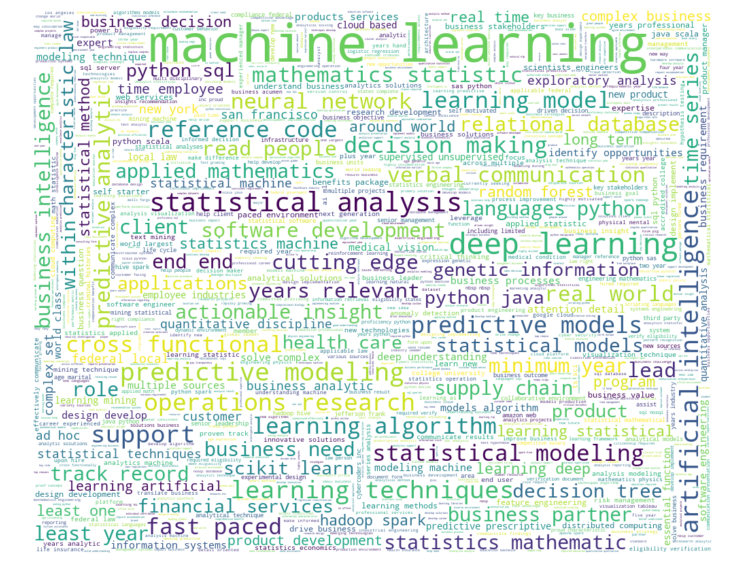

In [24]:
stopwords.update(['experience', 'following', 'candidates', 'big', 'background','developing', 'characteristics', 'data', 'team', 'data', 'scientist', 'strong', 'project', 
                  'solution', 'technology', 'science', 'model', 'knowledge','skill', 'work', 'build', 'will', 'knowledge', 'application','gender', 'identity', 'equal',
                  'opportunity','related','field', 'without', 'regard', 'national', 'origin', 'religion', 'sex', 'race', 'color', 'veteran', 'status','sexual',
                  'orientation','opportunity', 'employer', 'qualified','applicant','skills', 'job', 'summary', 'advanced', 'system', 'applicants', 'receive', 'large', 'best', 'practice', 'problem'
                 , 'processing', 'affirmative', 'action', 'employment', 'consideration', 'receive', 'united', 'state', 'programming', 'computer', 'working', 'saying', 
                  'preferred', 'qualification', 'disability', 'protected', 'structured', 'unstructured', 'problems', 'technical', 'internal', 'external', 'non',
                 'subject', 'matter', 'please', 'apply', 'using', 'dental', 'reasonable', 'accomodation', 'join', 'us', 'tools', 'individuals', 'disabilities'
                 , 'type', 'full', 'wide', 'range', 'duties', 'responsibilities', 'stakeholder', 'oral', 'written', 'ideal', 'candidate', 'ability', 'qualifications', 'well',
                  'must', 'able', 'unit', 'member','excellent','bachelor','master','degree','member','organization','phd','looking','include','teams','position','posted', 'today', 'service', 
                  'clearance', 'days', 'ago', 'high', 'america','language','source','quality', 'level', 'every', 'use', 'case', 'additional','provide','member'])
wordcloud = WordCloud(stopwords=stopwords, background_color='white',
                     width=1000, height=800,max_words=1000).generate(aggregate_descriptions)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



In [25]:
# import tensorflow as tf
# from transformers import BertTokenizer, TFBertModel

# tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
# model = TFBertModel.from_pretrained('bert-base-uncased')
# input_ids = tf.constant(tokenizer.encode("Hello, my dog is cute"))[None, :]  # Batch size 1
# outputs = model(input_ids)
# last_hidden_states = outputs[0]  # The last hidden-state is the first element of the output tuple

In [26]:
wordcloud.words_

classified information': 0.012785208497246263,
 'quantitative statistics': 0.012785208497246263,
 'natural machine': 0.012785208497246263,
 'supporting': 0.0127360346184107,
 'understanding statistical': 0.0127360346184107,
 'techniques machine': 0.0127360346184107,
 'business process': 0.0127360346184107,
 'forward receiving': 0.0127360346184107,
 'education required': 0.012686860739575138,
 'histories manner': 0.012686860739575138,
 'receiving resume': 0.012686860739575138,
 'activities': 0.012637686860739576,
 'leading global': 0.012637686860739576,
 'unsupervised learning': 0.012588512981904013,
 'create new': 0.012588512981904013,
 'networks etc': 0.01253933910306845,
 'committed creating': 0.01253933910306845,
 'individual contributor': 0.01253933910306845,
 'help make': 0.01253933910306845,
 'applying machine': 0.012490165224232887,
 'minimum required': 0.012490165224232887,
 'sas sql': 0.012490165224232887,
 'diverse sources': 0.012490165224232887,
 'mathematics operation': 0.0

In [27]:
import spacy
import en_core_web_sm
nlp = en_core_web_sm.load()
# nlp = spacy.load('en_core_web_lg')

In [28]:
top_frequent_word = list(wordcloud.words_)

In [29]:
vectorsSkills = []
counter = 0 

for word in top_frequent_word:
    vectorsSkills.append(nlp(word).vector / np.linalg.norm(nlp(word).vector))

In [30]:
numclusters   = range(1, 20)
kmeans        = [KMeans(n_clusters=i) for i in numclusters]
kSkill       = [kmeans[i].fit(vectorsSkills) for i in range(len(kmeans))]
scoreSkill   = [kSkill[i].score(vectorsSkills) for i in range(len(kmeans))]
print('scoreSkill done.')
clusterSkill = [kSkill[i].labels_ for i in range(len(kmeans))]
print('clusterSkill done.')

scoreSkill done.
clusterSkill done.


In [31]:
len(clusterSkill)

19

In [32]:
def getdata(skillList,clusterId):
    tempList=[]
    for i in clusterId:
        value = skillList[i]
        tempList.append(value + ' /n')
    return tempList

In [33]:
cluster0 = [i for i, e in enumerate(list(clusterSkill[18])) if e == 2]
getdata(top_frequent_word,cluster0)

['operations research /n',
 'mathematics statistic /n',
 'statistics machine /n',
 'models algorithm /n',
 'benefits package /n',
 'analytics machine /n',
 'cybercoders inc /n',
 'years industry /n',
 'years year /n',
 'years hand /n',
 'statistics operation /n',
 'solutions business /n',
 'insights recommendation /n',
 'models production /n',
 'models machine /n',
 'analytics platform /n',
 'wells fargo /n',
 'solutions complex /n',
 'solutions client /n',
 'years machine /n',
 'analytics technique /n',
 'requirements year /n',
 'trends pattern /n',
 'requirements access /n',
 'analytics statistic /n',
 'insights business /n',
 'methods machine /n',
 'techniques algorithm /n',
 'techniques machine /n',
 'histories manner /n',
 'mathematics operation /n',
 'statistics year /n',
 'techniques develop /n',
 'policies procedure /n',
 'services firm /n',
 'solutions help /n',
 'solutions scale /n',
 'reports presentation /n',
 'solutions support /n',
 'industries software /n',
 'engineers p

In [34]:
import json

import requests
from bs4 import BeautifulSoup

In [36]:
from owlready2 import *
onto = get_ontology("/home/rudresh/Documents/MSC3/S5/Code/Data/data.owl").load()

In [37]:
list(onto.classes())

[data.AdaBoost,
 data.Ensemble,
 data.Agnostic_Specifications,
 data.Production,
 data.Apriori_algorithm,
 data.Rule_System,
 data.Arithmetic_Mean,
 data.Statistics,
 data.BI_and_Datawarehousing,
 data.Coreskills,
 data.Back-Propagation,
 data.Neural_Networks,
 data.Bayesian,
 data.Learning_Algorithm,
 data.Boosting,
 data.BootStrap_Sampling,
 data.Model_Validation,
 data.Business_Analysis_and_IT_Projects,
 data.C4.5,
 data.Decision_Tree,
 data.C5.0,
 data.Cloud,
 data.Cluster_Validity,
 data.Clustering,
 data.Coefficient_of_variation,
 data.Conditional_Decision_Trees,
 data.Confusion_Matrix,
 data.DomainConcept,
 data.Cross_Validation,
 data.Data_Cleaning,
 data.Data_Science,
 data.Data_Engineering,
 data.Data_Prepration,
 data.Data_Visualization,
 data.Databases,
 data.Dataflow,
 data.Pradigms,
 data.Decision_Stump,
 data.Deep_Learning,
 data.Deep_belief_network,
 data.Dimensionality_Reduction,
 data.Distributed_ML_Libraries,
 data.Eclat_algorithm,
 data.Elastic_Net,
 data.Regulariza

In [30]:

data = None
with open("../DataScienceSkill/temp1.json") as f:
    s = f.read()
    s = s.replace('}\n{', '},\n{')
    data = json.loads(s)
    print(data[0]['job_title'])




Dialysis Technician


In [31]:
aggregate_descriptions = " ".join(i['job_description'].lower() for i in data if 'data science' in i['job_description'].lower())


# JsonJob_descriptions = None
# for i in data:
#     JsonJob_descriptions = "".join(i['job_description'].lower())
# #         print(i['job_description'].lower())
#         print(i['job_title'])
#     x = data[i]['job_title']
#     if 'data' in x:
#         print(i)
# print(JsonJob_descriptions)

In [42]:
def addEdge(graph,u,v): 
    graph[u].append(v) 
  
# definition of function 
def generate_edges(graph): 
    edges = [] 
    # for each node in graph 
    for node in graph: 
        # for each neighbour node of a single node 
        for neighbour in graph[node]: 
            # if edge exists then append 
            edges.append((node, neighbour)) 
    return edges 

In [53]:
#Rudresh

paper = {
        "abstract": "AI talent acquisition platform: Designed, created and deployed a framework using Conditional random field and Stanford core NLP model to parse the resume and job positions for a military organisation NATO.◦ IBM Cloud: Created and deployed docker and cloud foundry application on IBM Bluemix. Graph QL: Developed a GraphQL API to respond for the queries which predicts the estimated salary from the model based on location ,industry and job title inputs. Graph Database: Designed, deployed a Neo4j graph database script to migrate data from MySQL To Neo4j. Web Crawler: Created a python crawler script to scrape the data from the HTML pages using beautiful soup. ◦ Text Analytic: Created a rule based model to work as an extractor that pulls structured information from unstructured or semi-structured text using Annotated Query Language.Data Analyst: Used different statistical technique to gather data insights and presented in depth findings to improve business strategies and operations. ◦ Oracle Database Administration: Scheduled the database replication script to sync the data. Performed the database refresh, patch and upgrade on Oracle 11gR1/11gR2. Analyzed the database performance. Created partition and indexes on tables to improve the performance. Fine-tuned SQL queries to improve the efficiency. Data Migration: Created the PL/SQL stored procedures,functions and packages to migrate data from oracle db to Maria db using oracle JDBC. Unix Shell Scripting: Created a unix shell script to automate the daily activity task as per client requirement and deployed it on Cron server. Team Management: Managed a team of 4 people by assigning, guiding the task and making deliveries to client. Sentiment Analysis: Sentiment analysis on the amazon reviews using 1D convolution neural network. • Ship Detection in Satellite imagery: Ship detection in optical satellite images using Resnet-Unet model. • Fake reviews detection: Fake review detection on online platform based on user behaviors and text reviews.• Job post and resume matching : Applying the concept of NLP, ML and Multiple criteria sorting method to match and score the resume with job posting. it also involves scraping job post, building taxonomy and ontology.",
        "keywords": "data mining, computer science"
        }

In [54]:
import classifier.classifier as classifier
result = classifier.run_cso_classifier(paper, modules = "both", enhancement = "first", explanation = True)
print(result)

Computer Science Ontology loaded.
Model loaded.
{'syntactic': ['query languages', 'conditional random field', 'neural networks', 'html pages', 'sentiment analysis', 'database systems', 'natural language processing', 'data mining', 'web crawlers', 'rule base', 'python', 'sql', 'computer science', 'ontology', 'ship detection'], 'semantic': ['conditional random field', 'natural language processing', 'database systems', 'web crawlers', 'python', 'html', 'html pages', 'sql', 'sentiment analysis', 'neural networks', 'ship detection', 'ontology', 'data mining', 'computer science'], 'union': ['query languages', 'neural networks', 'conditional random field', 'sentiment analysis', 'html pages', 'database systems', 'natural language processing', 'data mining', 'web crawlers', 'rule base', 'python', 'sql', 'computer science', 'ontology', 'ship detection', 'html'], 'enhanced': ['machine learning', 'image segmentation', 'pattern recognition', 'computational linguistics', 'computer systems', 'artific

In [55]:

l_values = list(result['explanation'].values())
l_keys = list(result['explanation'].keys())

l_values.append(l_keys)
flat_list = [item for sublist in l_values for item in sublist]
flat_list =list(set(flat_list))


In [56]:
from pyvis.network import Network


G2=nx.Graph()

G2.add_edges_from(generate_edges(result['explanation']))

g_candidate = Network()
for i in flat_list:
    g_candidate.add_node(i)

add_edges = generate_edges(result['explanation'])
for i in add_edges:
    if(i[0]!=i[-1]):
        g_candidate.add_edge(i[0],i[-1])
g_candidate.show("Candidate1.html")


In [57]:
# valentin CV

paper2  = {
        "abstract": "Apply clustering in order to group data obtained from ECG signals and find heartbeat candidates. Internal software (Core Banking System) conception and development from the database to the interface. BPA & RPA (Business and Robotic Process Automation) for different projects includingits visualization and data analysis. Automate management tools including visualization and data analysis for which I developed a follow up software. Interface coordination between commercial and development teams, deliverables. Developed a follow up software, follow up projects. Data analysis and visualization. Management reports. Developed a follow up software, follow up projects. Data analysis and visualization. Management reports. Artificial Intelligence {ML, DL, NLP}, Languages and Logic, Graphs, Software Engineering, Mathematics {Proba, Stat, Alg}, Signal Processing, Operational Research, Big Data, Data Mining, B.I. ◦ (S5) Parser and matcher of a recruitment oer ◦ (S4) Ship detection by using satellite images, AI + Statistics ◦ Expr - Pfx Compiler (lambda, sematics, languages) ◦ Social Networks treatment (graphs) and infection simulation ◦ Genetic algorithm for heating district network optimization (OR) ◦ Cloud Configuration + tf-idf on Big Data",
        "keywords": "data mining, computer science"
        }

import classifier.classifier as classifier
result = classifier.run_cso_classifier(paper2, modules = "both", enhancement = "first", explanation = True)
print(result)



Computer Science Ontology loaded.
Model loaded.
{'syntactic': ['big data', 'optimization', 'software reengineering', 'mathematics', 'artificial intelligence', 'visualization', 'database systems', 'automation', 'signal processing', 'semantics', 'clustering algorithms', 'data mining', 'computer science', 'genetic algorithms', 'software engineering', 'natural language processing', 'correlation analysis', 'ship detection', 'social networks', 'software', 'compiler'], 'semantic': ['clustering algorithms', 'software', 'database systems', 'automation', 'visualization', 'correlation analysis', 'artificial intelligence', 'natural language processing', 'engineering', 'software engineering', 'software reengineering', 'mathematics', 'signal processing', 'big data', 'data mining', 'ship detection', 'compiler', 'semantics', 'social networks', 'genetic algorithms', 'optimization', 'computer science', 'association rules', 'network architecture', 'cloud services'], 'union': ['big data', 'association rul

In [60]:
l_values = list(result['explanation'].values())
l_keys = list(result['explanation'].keys())

l_values.append(l_keys)
flat_list = [item for sublist in l_values for item in sublist]
flat_list =list(set(flat_list))


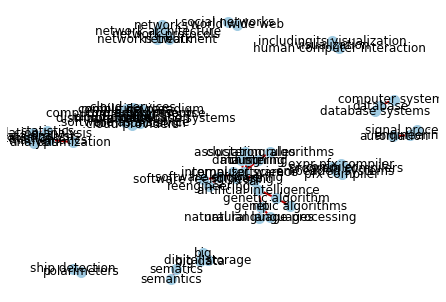

In [61]:
G3=nx.Graph()

G3.add_edges_from(generate_edges(result['explanation']))
nx.draw(G3,with_labels = True,node_color='#A0CBE2',edge_color='#BB0000',width=2, node_size=100)
plt.savefig("graph.png", dpi=1000)
plt.show() 


g_candidate = Network()
for i in flat_list:
    g_candidate.add_node(i)

add_edges = generate_edges(result['explanation'])
for i in add_edges:
    if(i[0]!=i[-1]):
        g_candidate.add_edge(i[0],i[-1])
g_candidate.show("Candidate2.html")
 

In [47]:
paper1 = {
        "abstract": "Our society is powered and dominated by knowledge and skills mastery, such that skill management has become a corner stone of the human resource task. Indeed, skills form an essential -practically characterizing - feature of a candidate’s profile, a job experience, or a job offer. Yet, extracting skills from a document and processing them for a specific task is a challenging task as skills can be formulated in many different ways and through many different expressions. Furthermore, skills can have different granularity: some are very specific skills while others are broader and higher-level. The goal of the internship is to tackle this interesting problem by creating a reference skills ontology that could be used when detecting skills in a textual document. Specifically, this means detecting different phrasing of the same skill as well as structuring the skills in an ontological model. The techniques that will be used include ontology engineering, natural language processing and in particular information extraction using both unsupervised and self-supervised methods. The successful candidate will have the opportunity to research and apply the latest language models (ELMo, BERT and derivative) and acquire a deep understanding of the role and contribution of word embeddings in understanding natural language.",
        "keywords": "data mining, computer science"
        }


import classifier.classifier as classifier
result = classifier.run_cso_classifier(paper1, modules = "both", enhancement = "first", explanation = True)
print(result)

Computer Science Ontology loaded.
Model loaded.
{'syntactic': ['information extraction', 'ontology engineering', 'language model', 'natural languages', 'ontology', 'natural language processing', 'data mining', 'computer science', 'word embedding'], 'semantic': ['ontology', 'engineering', 'ontology engineering', 'natural languages', 'natural language processing', 'information extraction', 'language model', 'data mining', 'computer science'], 'union': ['information extraction', 'engineering', 'ontology engineering', 'language model', 'natural languages', 'ontology', 'natural language processing', 'data mining', 'computer science', 'word embedding'], 'enhanced': ['information analysis', 'information retrieval', 'semantic web', 'computational linguistics', 'speech recognition', 'linguistics', 'semantics', 'artificial intelligence'], 'explanation': {'ontology': ['ontology', 'ontological', 'ontology engineering'], 'natural language processing': ['natural language processing', 'information ex

In [48]:
l_values = list(result['explanation'].values())
l_keys = list(result['explanation'].keys())

l_values.append(l_keys)
flat_list = [item for sublist in l_values for item in sublist]
flat_list =list(set(flat_list))

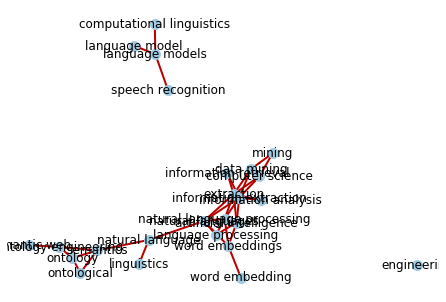

In [52]:

from pyvis.network import Network

G1=nx.Graph()

G1.add_edges_from(generate_edges(result['explanation']))
nx.draw(G1,with_labels = True,node_color='#A0CBE2',edge_color='#BB0000',width=2, node_size=100)
plt.savefig("graph.png", dpi=1000)
plt.show()

g_jobDescription = Network()
for i in flat_list:
    g_jobDescription.add_node(i)

add_edges = generate_edges(result['explanation'])
for i in add_edges:
    if(i[0]!=i[-1]):
        g_jobDescription.add_edge(i[0],i[-1])
g_jobDescription.show("jobdescription.html")



In [50]:
generate_edges(result['explanation'])

[('ontology', 'ontology'),
 ('ontology', 'ontological'),
 ('ontology', 'ontology engineering'),
 ('natural language processing', 'natural language processing'),
 ('natural language processing', 'information extraction'),
 ('natural language processing', 'word embeddings'),
 ('natural language processing', 'extraction'),
 ('natural language processing', 'language processing'),
 ('ontology engineering', 'ontology engineering'),
 ('information extraction', 'information extraction'),
 ('information extraction', 'extraction'),
 ('language model', 'language models'),
 ('word embedding', 'word embeddings'),
 ('natural languages', 'natural language processing'),
 ('natural languages', 'natural language'),
 ('natural languages', 'information extraction'),
 ('natural languages', 'word embeddings'),
 ('natural languages', 'language processing'),
 ('natural languages', 'extraction'),
 ('data mining', 'information extraction'),
 ('data mining', 'data mining'),
 ('data mining', 'mining'),
 ('data mi

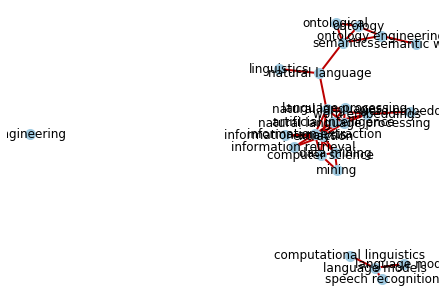

In [51]:
import networkx as nx

G=nx.Graph()
G.add_edges_from(generate_edges(result['explanation']))

import matplotlib.pyplot as plt
nx.draw(G,with_labels = True,node_color='#A0CBE2',edge_color='#BB0000',width=2, node_size=100)
plt.savefig("graph.png", dpi=1000)
plt.show() 

In [63]:
import gmatch4py as gm

In [79]:
ged=gm.GraphEditDistance(1,1,1,1) # all edit costs are equal to 1
result=ged.compare([G1,G3],None) 
ged.similarity(result)

array([[1.        , 0.        ],
       [0.10394265, 1.        ]])